<a href="https://colab.research.google.com/github/Ahmed2045/sentiment-analysis-nlp-/blob/main/arabic_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.tree import *
from sklearn.model_selection import train_test_split

In [ ]:

dFrame = pd.read_excel (r'AJGT.xlsx')
x_train,x_test=train_test_split(dFrame,test_size=0.20,random_state=42)




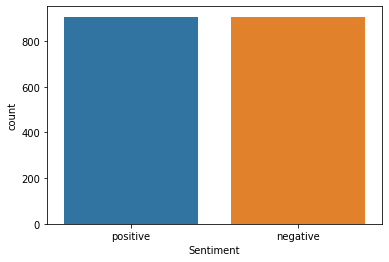

In [ ]:
sns.countplot(data=x_train,x=dFrame['Sentiment'])


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword = stopwords.words('arabic')
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words = stopword)
X = count_vect.fit_transform(dFrame)

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)
X_tfidf.shape


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'ان', 'انفك', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظل', 'ظن', 'عد', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء'] not in stop_words.
  % sorted(inconsistent)


(2, 2)

In [ ]:
from sklearn.svm import SVC
vectorizer=TfidfVectorizer(analyzer='char_wb',ngram_range=(3,5),min_df=0.01,max_df=0.5)
clf=SVC(kernel='rbf')


In [ ]:
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(vectorizer,clf)


In [ ]:
pipe.fit(x_train.Feed,x_train.Sentiment)


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='char_wb', max_df=0.5, min_df=0.01,
                                 ngram_range=(3, 5))),
                ('svc', SVC())])

In [ ]:
y_pred=pipe.predict(x_test.Feed)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve,auc,RocCurveDisplay,classification_report


In [ ]:
accuracy_score(x_test.Sentiment,y_pred)*100


85.9504132231405

In [ ]:
input=['شكرا لك يا اخي']
y_pred=pipe.predict(input)
print(y_pred)
input=['يا لك من حقير']
yd=pipe.predict(input)
print(yd)

['positive']
['negative']
